# Python Data Visualization

In [2]:
#Import primary modules.
import numpy as np  
import pandas as pd 
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.8.4


In [25]:
df = pd.read_csv('facebook_ads_data(2.0).csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [27]:
df.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [29]:
df.columns

Index(['ad_date', 'campaign_name', 'total_spend', 'total_impressions',
       'total_clicks', 'total_value', 'cpc', 'cpm', 'ctr', 'romi'],
      dtype='object')

>1. Щоденні витрати та ROMI у 2021 році з рухомим середнім

In [35]:
# Фільтруємо дані для 2021 року
df['ad_date'] = pd.to_datetime(df['ad_date'])
df_2021 = df[df['ad_date'].dt.year == 2021]


In [37]:
# Групування даних по дням та обчислення метрик
daily_data = df_2021.groupby('ad_date').agg({'total_spend': 'sum', 'romi': 'mean'})


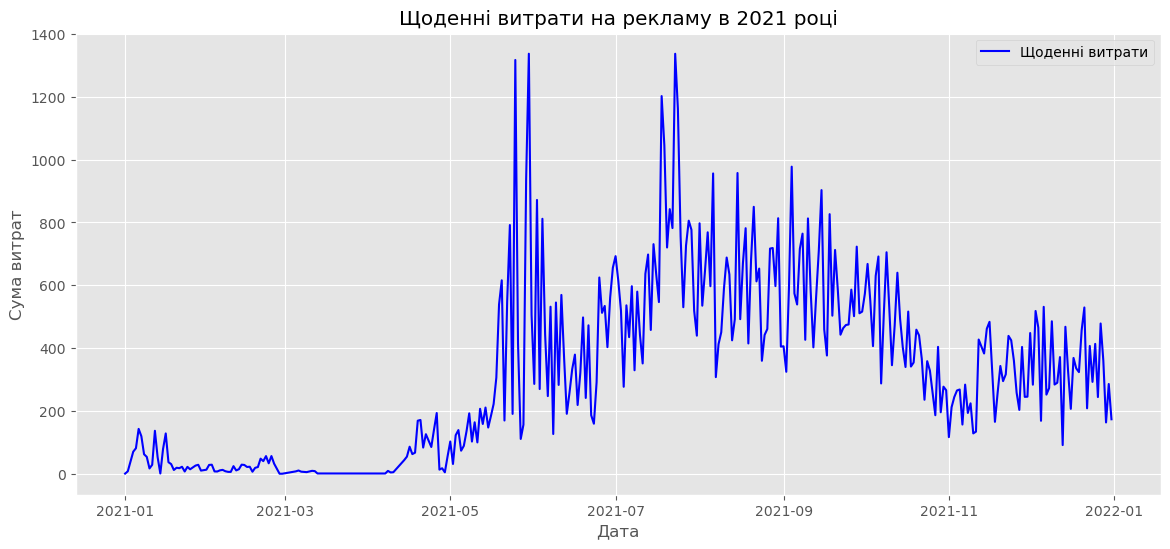

In [43]:
# Групуємо дані по днях і підсумовуємо витрати
daily_spend_2021 = df_2021.groupby('ad_date')['total_spend'].sum()

# Створюємо графік
plt.figure(figsize=(14, 6))
plt.plot(daily_spend_2021.index, daily_spend_2021.values, label='Щоденні витрати', color='blue')
plt.title('Щоденні витрати на рекламу в 2021 році')
plt.xlabel('Дата')
plt.ylabel('Сума витрат')
plt.legend()
plt.show()

In [47]:
# Групуємо дані по днях і обчислюємо середнє значення ROMI та суму витрат
daily_data_2021 = df_2021.groupby('ad_date').agg({
    'romi': 'mean',
    'total_spend': 'sum'
}).reset_index()

In [49]:
# Застосовуємо метод rolling() для обчислення рухомого середнього (7 днів)
daily_data_2021['romi_rolling'] = daily_data_2021['romi'].rolling(window=7).mean()
daily_data_2021['spend_rolling'] = daily_data_2021['total_spend'].rolling(window=7).mean()


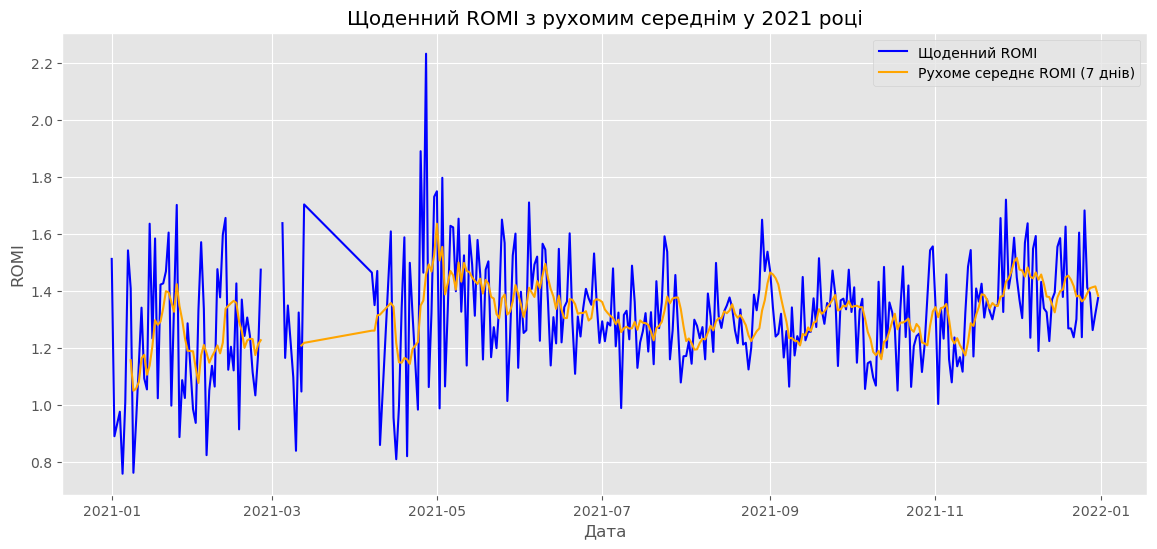

In [51]:
# Побудова графіку для щоденного ROMI з рухомим середнім
plt.figure(figsize=(14, 6))
plt.plot(daily_data_2021['ad_date'], daily_data_2021['romi'], label='Щоденний ROMI', color='blue')
plt.plot(daily_data_2021['ad_date'], daily_data_2021['romi_rolling'], label='Рухоме середнє ROMI (7 днів)', color='orange')
plt.title('Щоденний ROMI з рухомим середнім у 2021 році')
plt.xlabel('Дата')
plt.ylabel('ROMI')
plt.legend()
plt.show()


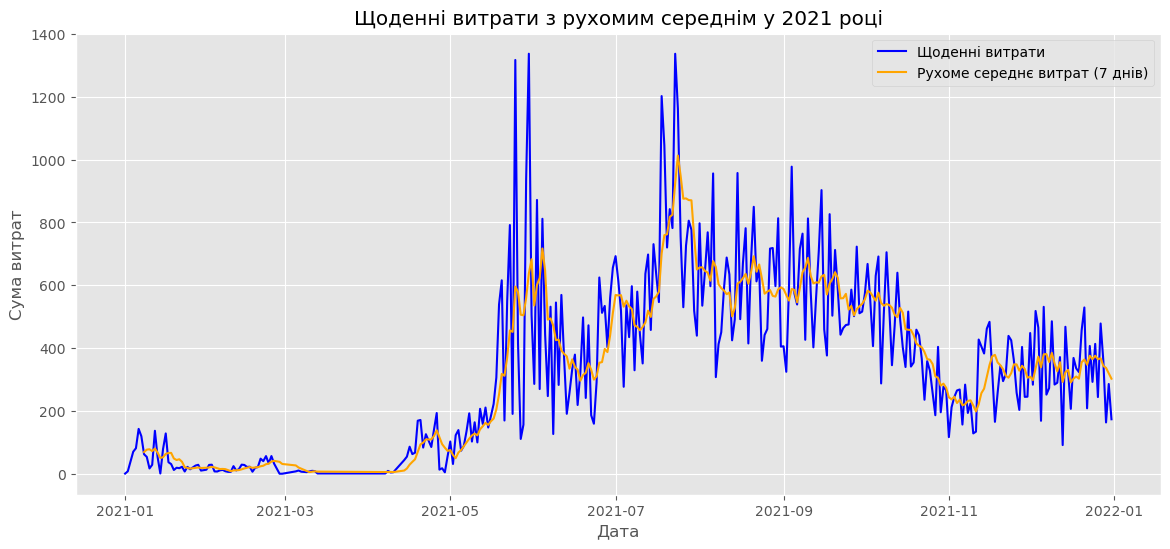

In [53]:
# Побудова графіку для щоденної суми витрат з рухомим середнім
plt.figure(figsize=(14, 6))
plt.plot(daily_data_2021['ad_date'], daily_data_2021['total_spend'], label='Щоденні витрати', color='blue')
plt.plot(daily_data_2021['ad_date'], daily_data_2021['spend_rolling'], label='Рухоме середнє витрат (7 днів)', color='orange')
plt.title('Щоденні витрати з рухомим середнім у 2021 році')
plt.xlabel('Дата')
plt.ylabel('Сума витрат')
plt.legend()
plt.show()

>2. Сума витрат та ROMI по кампаніях

In [56]:
# Групування за назвою кампанії та обчислення загальної суми витрат та середнього ROMI
campaign_data = df.groupby('campaign_name').agg({'total_spend': 'sum', 'romi': 'sum'})


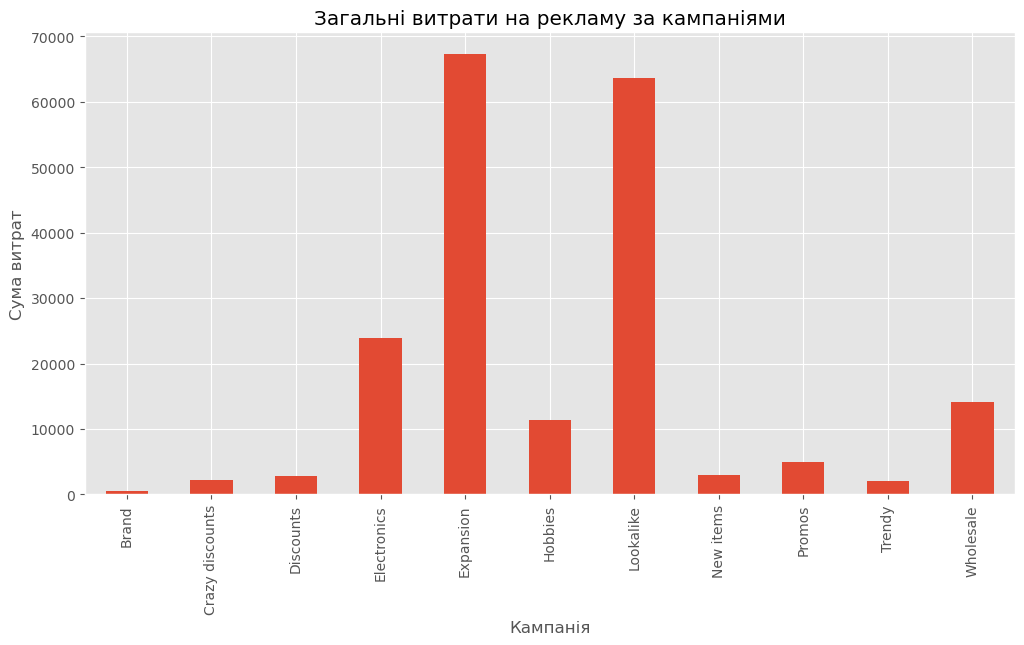

In [58]:
# Графік витрат на рекламу за кампаніями
plt.figure(figsize=(12, 6))
campaign_data['total_spend'].plot(kind='bar')
plt.title('Загальні витрати на рекламу за кампаніями')
plt.xlabel('Кампанія')
plt.ylabel('Сума витрат')
plt.show()

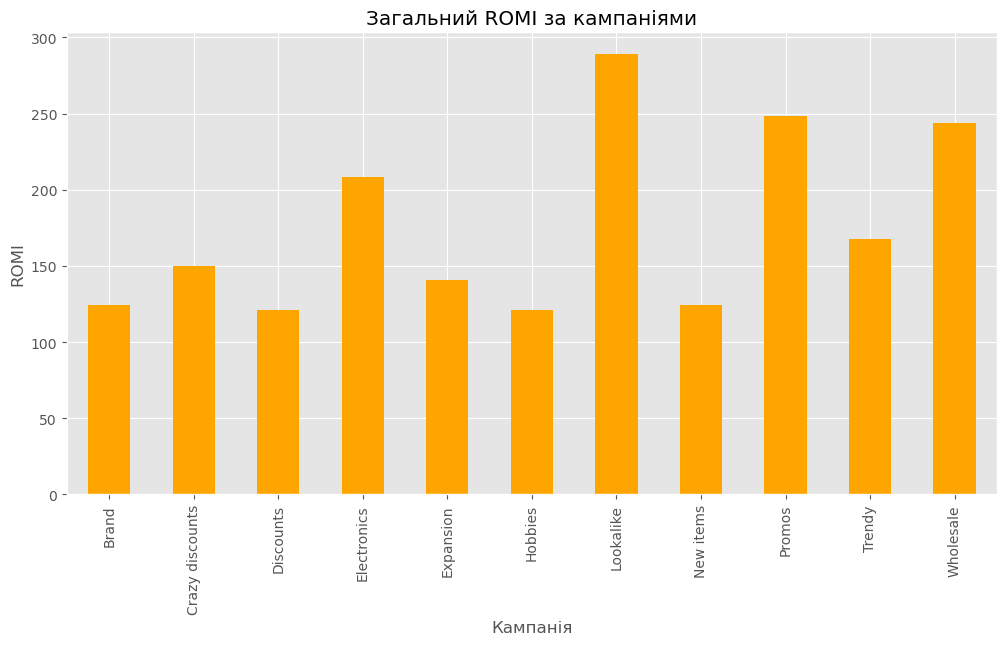

In [60]:
# Графік ROMI за кампаніями
plt.figure(figsize=(12, 6))
campaign_data['romi'].plot(kind='bar', color='orange')
plt.title('Загальний ROMI за кампаніями')
plt.xlabel('Кампанія')
plt.ylabel('ROMI')
plt.show()

>3. Розкид щоденного ROMI по кампаніях (box plot)

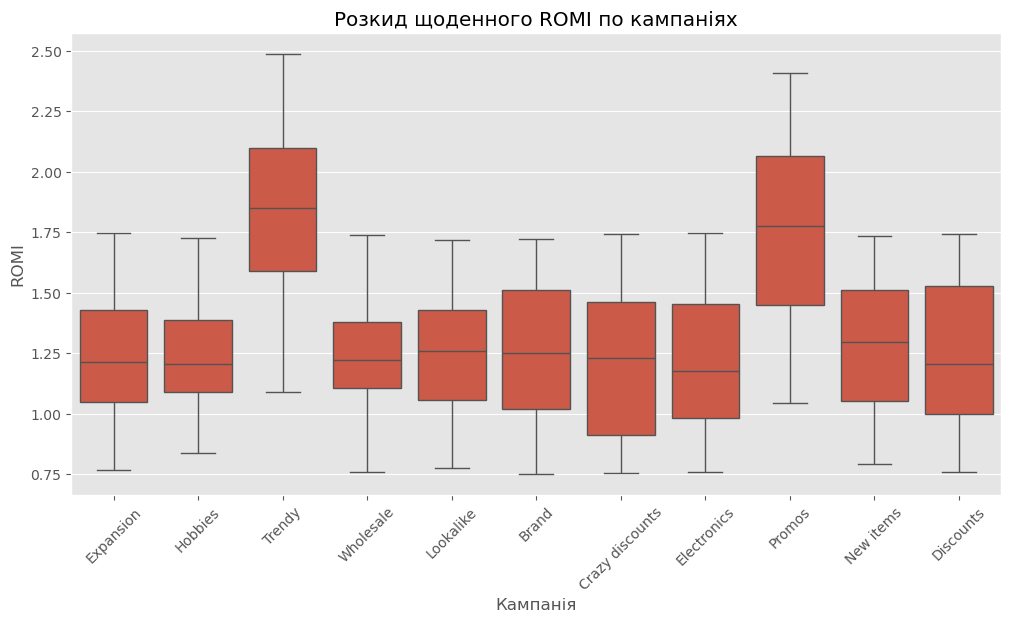

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='campaign_name', y='romi')
plt.title('Розкид щоденного ROMI по кампаніях')
plt.xlabel('Кампанія')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.show()


>4. Гістограма розподілу ROMI

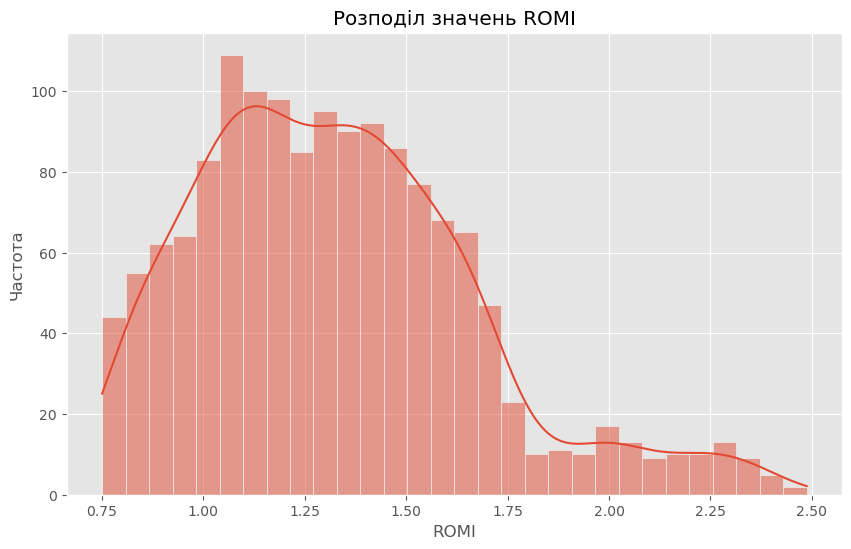

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['romi'], bins=30, kde=True)
plt.title('Розподіл значень ROMI')
plt.xlabel('ROMI')
plt.ylabel('Частота')
plt.show()


>5. Теплова карта кореляції числових показників

In [75]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Обчислення кореляції між числовими колонками
correlation_matrix = numeric_df.corr()

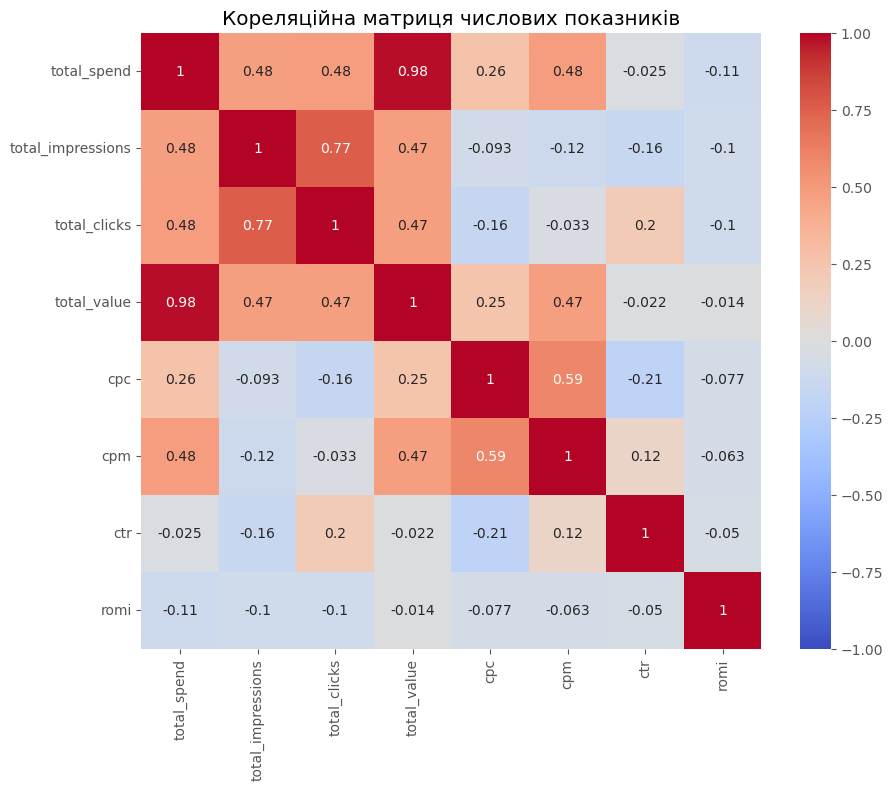

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Кореляційна матриця числових показників")
plt.show()

>6. Точкова діаграма з лінійною регресією (total_spend та total_value)



<Figure size 1000x600 with 0 Axes>

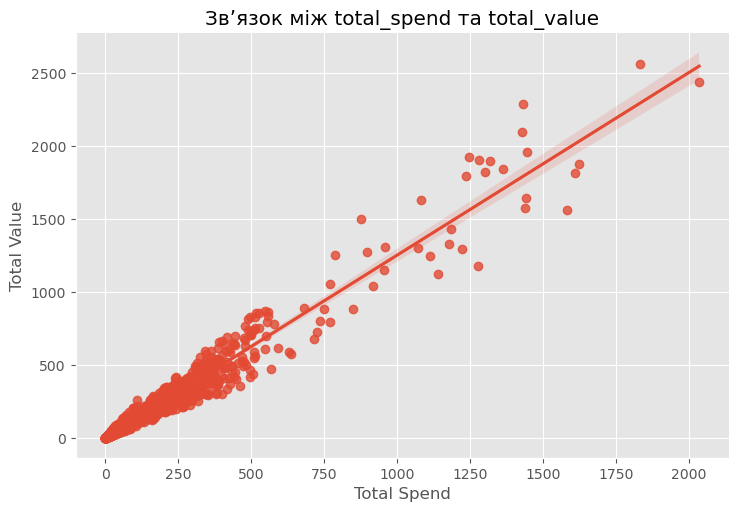

In [80]:
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='total_spend', y='total_value', aspect=1.5)
plt.title('Звʼязок між total_spend та total_value')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.show()